# Deduplication 2nd step (no amounts) pointwise

sentence 1 = Take TX + merchant1, 

sentence 2 = Take TX + merchant2

label =1 , if merchant 1 = m2



The candidate duplicates for merchant 1 should be retrieved from a first candidate selection step

In [1]:
"""
DROP TABLE  IF EXISTS  tmp_counterparty_diff_23_06_24_06;
--DROP TABLE tmp_trans_23_06_24_06
CREATE TABLE tmp_counterparty_diff_23_06_24_06 AS
select ftt.transaction_id,
       ftt.corrected_made_on,
       ftt.amount,
       ftt.currency_code,
       ftt.description,
    json_extract_path_text(ftt.login_provider_additional_attributes, 'original_description')
        as original_description_plaid,
       ftt.merchant_name,
       json_extract_path_text(ftt.login_provider_additional_attributes, 'merchant_name') as merchant_name_plaid,
    json_extract_path_text(ftt.login_provider_additional_attributes, 'transaction_type')
        as transaction_type_plaid,
      json_extract_path_text(ftt.login_provider_additional_attributes, 'counterparties', '0', 'name') AS counterparty_name,
    json_extract_path_text(ftt.login_provider_additional_attributes, 'counterparties', '0', 'type') AS counterparty_type,
    --json_extract_path_text(ftt.login_provider_additional_attributes, 'counterparties', '0', 'website') AS counterparty_website,
    --json_extract_path_text(ftt.login_provider_additional_attributes, 'counterparties', '0', 'logo_url') AS counterparty_logo_url,
    --json_extract_path_text(ftt.login_provider_additional_attributes, 'counterparties', '0', 'entity_id') AS counterparty_entity_id,
    --json_extract_path_text(ftt.login_provider_additional_attributes, 'counterparties', '0', 'confidence_level') AS counterparty_confidence_level,
       ftt.merchant_id,
       ftt.company,
        json_extract_path_text(ftt.login_provider_additional_attributes, 'personal_finance_category', 'detailed')
        as category_detailed_plaid,
        json_extract_path_text(ftt.login_provider_additional_attributes, 'personal_finance_category', 'primary')
        as category_primary_plaid,
        --json_extract_path_text(ftt.login_provider_additional_attributes, 'payment_channel')
        --as payment_channel,
        --json_extract_path_text(ftt.login_provider_additional_attributes, 'payment_method')
        --as payment_method,
        --json_extract_path_text(ftt.login_provider_additional_attributes, 'payment_processor_method')
        --as payment_processor_method,
        --json_extract_path_text(ftt.login_provider_additional_attributes, 'location','city')
        --as city,
        --json_extract_path_text(ftt.login_provider_additional_attributes, 'location','region')
        --as region,
        --json_extract_path_text(ftt.login_provider_additional_attributes, 'location','country')
        --as country,
        --ftt.status,
       --ftt.decline_code,
      --ftt.login_provider_additional_attributes,
     -- COALESCE(
     --       merchant_name,
     --       CASE
     --           WHEN counterparty_type = 'merchant' THEN counterparty_name
      --          ELSE NULL
      --      END
      --  ) AS merchant_name_combined,

    COALESCE(
    original_description_plaid, description
    ) AS description_combined
from analytics.fct_transactions ftt
where corrected_made_on >= '2024-05-05' and corrected_made_on <= '2024-06-05'
and description_combined is not null
and description_combined != ''
AND description_combined != ' '
and amount != 0.0
and description_combined != merchant_name
and description_combined != merchant_name_plaid

-- and json_extract_path_text(ftt.login_provider_additional_attributes, 'counterparties', '0', 'type') = 'merchant'
and merchant_name is not null
AND merchant_name_plaid is not null
  and merchant_name not in ('',' ')
AND merchant_name_plaid  not in  ('',' ')
and category_primary_plaid NOT IN ('BANK_FEES','TRANSFER_IN','TRANSFER_OUT','LOAN_PAYMENTS')
and lower(replace(merchant_name,' ','')) != lower(replace(merchant_name_plaid,' ',''))
ORDER BY RAND()
limit 1000000;


select *
from tmp_counterparty_diff_23_06_24_06
limit 1000;


DROP TABLE  IF EXISTS  tmp_counterparty_same_23_06_24_06;
--DROP TABLE tmp_trans_23_06_24_06
CREATE TABLE tmp_counterparty_same_23_06_24_06 AS
select ftt.transaction_id,
       ftt.corrected_made_on,
       ftt.amount,
       ftt.currency_code,
       ftt.description,
    json_extract_path_text(ftt.login_provider_additional_attributes, 'original_description')
        as original_description_plaid,
       ftt.merchant_name,
       json_extract_path_text(ftt.login_provider_additional_attributes, 'merchant_name') as merchant_name_plaid,
    json_extract_path_text(ftt.login_provider_additional_attributes, 'transaction_type')
        as transaction_type_plaid,
      json_extract_path_text(ftt.login_provider_additional_attributes, 'counterparties', '0', 'name') AS counterparty_name,
    json_extract_path_text(ftt.login_provider_additional_attributes, 'counterparties', '0', 'type') AS counterparty_type,
    --json_extract_path_text(ftt.login_provider_additional_attributes, 'counterparties', '0', 'website') AS counterparty_website,
    --json_extract_path_text(ftt.login_provider_additional_attributes, 'counterparties', '0', 'logo_url') AS counterparty_logo_url,
    --json_extract_path_text(ftt.login_provider_additional_attributes, 'counterparties', '0', 'entity_id') AS counterparty_entity_id,
    --json_extract_path_text(ftt.login_provider_additional_attributes, 'counterparties', '0', 'confidence_level') AS counterparty_confidence_level,
       ftt.merchant_id,
       ftt.company,
        json_extract_path_text(ftt.login_provider_additional_attributes, 'personal_finance_category', 'detailed')
        as category_detailed_plaid,
        json_extract_path_text(ftt.login_provider_additional_attributes, 'personal_finance_category', 'primary')
        as category_primary_plaid,
        --json_extract_path_text(ftt.login_provider_additional_attributes, 'payment_channel')
        --as payment_channel,
        --json_extract_path_text(ftt.login_provider_additional_attributes, 'payment_method')
        --as payment_method,
        --json_extract_path_text(ftt.login_provider_additional_attributes, 'payment_processor_method')
        --as payment_processor_method,
        --json_extract_path_text(ftt.login_provider_additional_attributes, 'location','city')
        --as city,
        --json_extract_path_text(ftt.login_provider_additional_attributes, 'location','region')
        --as region,
        --json_extract_path_text(ftt.login_provider_additional_attributes, 'location','country')
        --as country,
        --ftt.status,
       --ftt.decline_code,
      --ftt.login_provider_additional_attributes,
      --COALESCE(
      --      merchant_name,
       --     CASE
        --        WHEN counterparty_type = 'merchant' THEN counterparty_name
         --       ELSE NULL
        --    END
       -- ) AS merchant_name_combined,

    COALESCE(
    original_description_plaid, description
    ) AS description_combined
from analytics.fct_transactions ftt
where corrected_made_on >= '2024-05-05' and corrected_made_on <= '2024-06-05'
and description_combined is not null
and description_combined != ''
AND description_combined != ' '
and amount != 0.0
and description_combined != merchant_name
and description_combined != merchant_name_plaid
--and json_extract_path_text(ftt.login_provider_additional_attributes, 'counterparties', '0', 'type') = 'merchant'
and merchant_name is not null
AND merchant_name_plaid is not null
and merchant_name not in ('',' ')
AND merchant_name_plaid  not in  ('',' ')
and category_primary_plaid NOT IN ('BANK_FEES','TRANSFER_IN','TRANSFER_OUT')
and lower(replace(merchant_name,' ','')) = lower(replace(merchant_name_plaid,' ',''))
ORDER BY RAND()
limit 1000000;

select *
    from tmp_counterparty_same_23_06_24_06
        limit 100;
--------------------------------------------

drop table if exists tmp_distinct_merchants
create table tmp_distinct_merchants
select distinct description, merchant_name, category_detailed_plaid
    from tmp_counterparty_same_23_06_24_06


---- create negative samples --------------
DROP TABLE IF EXISTS tmp_distinct_merchants
CREATE TABLE tmp_distinct_merchants AS
SELECT DISTINCT merchant_name2, category_detailed_plaid2
FROM tmp_counterparty_same_23_06_24_06_NEG;

select * from tmp_distinct_merchants

select category_detailed_plaid2, count(merchant_name2) as num_merchs
from tmp_distinct_merchants
group by  category_detailed_plaid2


DROP TABLE IF EXISTS tmp_distinct_merchants_small
CREATE TABLE tmp_distinct_merchants_small AS
SELECT * FROM (
    SELECT *,
           ROW_NUMBER() OVER (PARTITION BY category_detailed_plaid2 ORDER BY RANDOM()) AS rn3
    FROM tmp_distinct_merchants
) AS subquery
WHERE rn3 <= 100;

select category_detailed_plaid2, count(merchant_name2) as num_merchs
from tmp_distinct_merchants_small
group by  category_detailed_plaid2


-- alter table tmp_counterparty_diff_23_06_24_06
--     drop column label

select * from tmp_counterparty_diff_23_06_24_06 limit 10

-- join the two table on category
DROP TABLE IF EXISTS tmp_counterparty_same_23_06_24_06_NEG_samples3;
CREATE TABLE tmp_counterparty_same_23_06_24_06_NEG_samples3 AS
select tmp_counterparty_diff_23_06_24_06.*, t2.merchant_name2
from tmp_counterparty_diff_23_06_24_06
INNER join (select  merchant_name2,  category_detailed_plaid2
          from tmp_distinct_merchants_small  ) t2
on tmp_counterparty_diff_23_06_24_06.category_detailed_plaid = t2.category_detailed_plaid2
where
 tmp_counterparty_diff_23_06_24_06.merchant_name != t2.merchant_name2

select * from tmp_counterparty_same_23_06_24_06_NEG_samples3 limit 10

select count(*) from tmp_counterparty_same_23_06_24_06_NEG_samples3

--- downsample as this is massive
DROP table if exists tmp_counterparty_same_23_06_24_06_NEG_samples
CREATE TABLE tmp_counterparty_same_23_06_24_06_NEG_samples AS
SELECT * FROM (
    SELECT *,
           ROW_NUMBER() OVER (PARTITION BY transaction_id ORDER BY RANDOM()) AS rn3
    FROM tmp_counterparty_same_23_06_24_06_NEG_samples3
) AS subquery
WHERE rn3 <= 4;

select count(*) from tmp_counterparty_same_23_06_24_06_NEG_samples

select * from tmp_counterparty_same_23_06_24_06_NEG_samples limit 10


ALTER TABLE tmp_counterparty_same_23_06_24_06_NEG_samples
DROP COLUMN rn3
-----------------------

select * from tmp_counterparty_diff_23_06_24_06 limit 100

select * from tmp_counterparty_same_23_06_24_06 limit 100




----- Where Cleo merchant and plaid merchant are different , add a merchant2 =  to indicate they are duplicates
ALTER TABLE tmp_counterparty_diff_23_06_24_06 ADD COLUMN merchant_name2 varchar(256);
UPDATE tmp_counterparty_diff_23_06_24_06 SET merchant_name2 = counterparty_name;
----- Where Cleo merchant and plaid merchant are different , add a label = 1 to indicate they are duplicates
ALTER TABLE tmp_counterparty_diff_23_06_24_06 ADD COLUMN label INT;
update tmp_counterparty_diff_23_06_24_06 set label = 1::INT;



select count(*) from tmp_counterparty_same_23_06_24_06_NEG_samples
select count(*) from tmp_counterparty_diff_23_06_24_06



----- addd label 0 where they are not duplicates
ALTER TABLE tmp_counterparty_same_23_06_24_06_NEG_samples ADD COLUMN label INT;
update tmp_counterparty_same_23_06_24_06_NEG_samples set label = 0::INT;
---- get a ra

------ create table of pairs
DROP TABLE IF EXISTS tmp_counterparty_merchant_23_06_24_06_pairs;
CREATE TABLE tmp_counterparty_merchant_23_06_24_06_pairs AS
SELECT *
FROM tmp_counterparty_diff_23_06_24_06
WHERE 1 = 0;  -- This ensures no data is copied, just the structure


--- concatenate positive and negative samples
INSERT INTO tmp_counterparty_merchant_23_06_24_06_pairs
SELECT * FROM tmp_counterparty_diff_23_06_24_06
UNION ALL
SELECT * FROM tmp_counterparty_same_23_06_24_06_NEG_samples;

select count(*) from tmp_counterparty_merchant_23_06_24_06_pairs

select * from tmp_counterparty_merchant_23_06_24_06_pairs limit 10

select * from tmp_counterparty_same_23_06_24_06_NEG_samples limit 10
select * from tmp_counterparty_diff_23_06_24_06 limit 10

-- Add a new column if it doesn't exist
---ALTER TABLE tmp_trans_23_06_24_06_pairs DROP COLUMN description_combined_processed ;



ALTER TABLE tmp_counterparty_merchant_23_06_24_06_pairs ADD COLUMN description_combined_processed varchar(65535);
-- Update the column with chained REGEXP_REPLACE functions
-- Replace sequences of `\+` with `\`
UPDATE tmp_counterparty_merchant_23_06_24_06_pairs
SET description_combined_processed = REGEXP_REPLACE(original_description_plaid, '\\\\+', '\\');



-- Replace sequences of any character repeated 4 or more times with a space
UPDATE tmp_counterparty_merchant_23_06_24_06_pairs
SET description_combined_processed = REGEXP_REPLACE(original_description_plaid, '\\d{4,}', ' ');

-- Replace sequences of any character repeated 4 or more times with a space
UPDATE tmp_counterparty_merchant_23_06_24_06_pairs
SET description_combined_processed = REGEXP_REPLACE(original_description_plaid, '(.)\\\\1{3,}', '');

-- Replace multiple spaces with a single space
UPDATE tmp_counterparty_merchant_23_06_24_06_pairs
SET description_combined_processed = REGEXP_REPLACE(original_description_plaid, ' +', ' ');


-- DROP TABLE IF EXISTS tmp_merchant_pairs_23_06_24_06tmp_merchant_transaction_counts
SELECT * FROM tmp_merchant_transaction_counts

--- CREATE Validation dataset
"""

"\nDROP TABLE  IF EXISTS  tmp_counterparty_diff_23_06_24_06;\n--DROP TABLE tmp_trans_23_06_24_06\nCREATE TABLE tmp_counterparty_diff_23_06_24_06 AS\nselect ftt.transaction_id,\n       ftt.corrected_made_on,\n       ftt.amount,\n       ftt.currency_code,\n       ftt.description,\n    json_extract_path_text(ftt.login_provider_additional_attributes, 'original_description')\n        as original_description_plaid,\n       ftt.merchant_name,\n       json_extract_path_text(ftt.login_provider_additional_attributes, 'merchant_name') as merchant_name_plaid,\n    json_extract_path_text(ftt.login_provider_additional_attributes, 'transaction_type')\n        as transaction_type_plaid,\n      json_extract_path_text(ftt.login_provider_additional_attributes, 'counterparties', '0', 'name') AS counterparty_name,\n    json_extract_path_text(ftt.login_provider_additional_attributes, 'counterparties', '0', 'type') AS counterparty_type,\n    --json_extract_path_text(ftt.login_provider_additional_attributes, 

- Train a classification model  TX <m1> merchant1 <m2> merchant2 = 1,0

- Train a classification model  TX <m1> merchant1, amount m1 <m2> merchant2, amount 2 (to deduplicate existing merchant table) 

- train a binary classification model


- look into architechture modification and add numerical values as concatenation

https://sbert.net/docs/sentence_transformer/training_overview.html#dataset-format

In [2]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install awswrangler

Note: you may need to restart the kernel to use updated packages.


In [4]:
import awswrangler as wr

In [5]:
import pandas as pd

# Load train and validation data set

In [6]:
s3_path = "s3://cleo-data-science/transaction_enrichment/experimental_data/caste/trx-merchant-pair/cons_2024-05-15_2024-05-18_1.parquet/"
s3_path ="s3://cleo-data-science/transaction_enrichment/experimental_data/caste/data_tmp_trans_23_06_24_06_pairs/train/"

df_data_raw = wr.s3.read_parquet(path=s3_path)
df_data_raw.shape

(5000000, 18)

In [7]:
df_data_raw.head()

,transaction_id,corrected_made_on,amount,currency_code,description,original_description_plaid,merchant_name,merchant_name_plaid,transaction_type_plaid,counterparty_name,counterparty_type,merchant_id,company,category_detailed_plaid,category_primary_plaid,merchant_name2,label,description_combined_processed
0,9711158815,2024-05-06,-2.25,USD,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...,Hart Flamingofares,Hart-flamingofares,place,Hart-flamingofares,merchant,16280115,Hart Flamingofares,FOOD_AND_DRINK_RESTAURANT,FOOD_AND_DRINK,Hart-flamingofares,1,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...
1,9740980806,2024-05-08,-200.00,USD,PURCHASE AUTHORIZED ON 05/07 KIDS UNLIMITED IN...,PURCHASE AUTHORIZED ON 05/07 KIDS UNLIMITED IN...,Kids Unlimited,Kids Unlimited Inc,place,Kids Unlimited Inc,merchant,2289635,<NA>,GENERAL_SERVICES_CHILDCARE,GENERAL_SERVICES,Kids Unlimited Inc,1,PURCHASE AUTHORIZED ON 05/07 KIDS UNLIMITED IN...
2,9796548131,2024-05-13,-30.00,USD,CHECKCARD 0511 EDWARDGURKA-MATCO XXXXX96003 TX...,CHECKCARD 0511 EDWARDGURKA-MATCO XXXXX96003 TX...,Edwardgurka Matcotools Rosharon,Edwardgurka-matco,place,Edwardgurka-matco,merchant,11254807,<NA>,HOME_IMPROVEMENT_HARDWARE,HOME_IMPROVEMENT,Edwardgurka-matco,1,CHECKCARD 0511 EDWARDGURKA-MATCO XXXXX96003 TX...
3,9978142547,2024-05-18,-25.04,USD,Caseys,Caseys,Casey''s Lincoln,Casey''s,place,Casey''s,merchant,1883903,Caseys,GENERAL_MERCHANDISE_CONVENIENCE_STORES,GENERAL_MERCHANDISE,Casey''s,1,Caseys
4,9694955604,2024-05-05,-13.69,USD,Point Of Sale Withdrawal HUGO INSURANCE SOLNHT...,Point Of Sale Withdrawal HUGO INSURANCE SOLNH...,With,Hugo Insurance,special,Hugo Insurance,merchant,4644190,With,GENERAL_SERVICES_INSURANCE,GENERAL_SERVICES,Hugo Insurance,1,Point Of Sale Withdrawal HUGO INSURANCE SOLNHT...


In [8]:
s3_merchant_tx_amts1 = "s3://cleo-data-science/transaction_enrichment/experimental_data/caste/transactions_aggregations/2024-01-01_2024-06-01"
df_data_amts_merchants1 = wr.s3.read_parquet(path=s3_merchant_tx_amts1 )

s3_merchant_tx_amts2 = "s3://cleo-data-science/transaction_enrichment/experimental_data/caste/transactions_aggregations/2023-07-01_2023-12-31"
df_data_amts_merchants2 = wr.s3.read_parquet(path=s3_merchant_tx_amts2 )
df_data_amts_merchants2.head()

,merchant_name,distinct_transaction_count,avg_positive_amount,avg_negative_amount
0,Sunshine Girls Esta,1,0.0000,-22.9100
1,Just Next Door,13,1.4238,-34.9938
2,Sheppar Air Inc,49,0.0000,-34.4897
3,Hammond Electri,1,889.9200,0.0000
4,Go Fish,71,0.0000,-33.5708


In [9]:
df_data_amts_merchants = pd.concat([df_data_amts_merchants1, df_data_amts_merchants2], axis=0)

In [10]:
df_data_amts_merchants = df_data_amts_merchants.groupby('merchant_name').agg('sum')

In [11]:
df_data_amts_merchants.reset_index(drop=False, inplace=True)

In [12]:
df_data_amts_merchants.shape

(2795909, 6)

In [13]:
df_data_amts_merchants[df_data_amts_merchants['merchant_name']=='Almanac Beer']

,merchant_name,distinct_transaction_count,sum_positive_amount,sum_negative_amount,avg_positive_amount,avg_negative_amount
92108,Almanac Beer,135,0.00,-1238.85,0.0000,-15.4411


In [14]:
modeling_columns = ['transaction_id', 'amount','merchant_name','merchant_name2','description_combined_processed','label']

In [15]:
df_data_raw = df_data_raw[modeling_columns]

In [16]:
df_data_raw  = pd.merge(df_data_raw, df_data_amts_merchants.rename(columns={'distinct_transaction_count':'distinct_transaction_count_m1',\
    'sum_positive_amount':'sum_positive_amount_m1',\
        'sum_negative_amount':'sum_negative_amount_m1'}), left_on='merchant_name', right_on='merchant_name', how='left')

In [17]:
df_data_raw  = pd.merge(df_data_raw, df_data_amts_merchants.rename(columns={'distinct_transaction_count':'distinct_transaction_count_m2',\
    'sum_positive_amount':'sum_positive_amount_m2',\
        'sum_negative_amount':'sum_negative_amount_m2'}), left_on='merchant_name2', right_on='merchant_name', how='left')

In [18]:
df_data_raw.head()

,transaction_id,amount,merchant_name_x,merchant_name2,description_combined_processed,label,distinct_transaction_count_m1,sum_positive_amount_m1,sum_negative_amount_m1,avg_positive_amount_x,avg_negative_amount_x,merchant_name_y,distinct_transaction_count_m2,sum_positive_amount_m2,sum_negative_amount_m2,avg_positive_amount_y,avg_negative_amount_y
0,9711158815,-2.25,Hart Flamingofares,Hart-flamingofares,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...,1,4586,5.00,-8096.24,0.0077,-3.2477,<NA>,<NA>,NaN,NaN,NaN,NaN
1,9740980806,-200.00,Kids Unlimited,Kids Unlimited Inc,PURCHASE AUTHORIZED ON 05/07 KIDS UNLIMITED IN...,1,159,0.00,-12295.97,0.0000,-134.3195,<NA>,<NA>,NaN,NaN,NaN,NaN
2,9796548131,-30.00,Edwardgurka Matcotools Rosharon,Edwardgurka-matco,CHECKCARD 0511 EDWARDGURKA-MATCO XXXXX96003 TX...,1,55,0.00,-664.35,0.0000,-50.2307,<NA>,<NA>,NaN,NaN,NaN,NaN
3,9978142547,-25.04,Casey''s Lincoln,Casey''s,Caseys,1,3170405,9525.58,-20870803.11,0.0115,-17.5547,<NA>,<NA>,NaN,NaN,NaN,NaN
4,9694955604,-13.69,With,Hugo Insurance,Point Of Sale Withdrawal HUGO INSURANCE SOLNHT...,1,6576,2081.05,-272481.89,2.5643,-95.9977,<NA>,<NA>,NaN,NaN,NaN,NaN


In [19]:
df_data_raw.drop('merchant_name_y', axis=1, inplace=True)

In [20]:
df_data_raw[['distinct_transaction_count_m1','sum_positive_amount_m1','sum_negative_amount_m1']] = df_data_raw[['distinct_transaction_count_m1','sum_positive_amount_m1','sum_negative_amount_m1']].fillna(0)
df_data_raw[['distinct_transaction_count_m2','sum_positive_amount_m2','sum_negative_amount_m2']] = df_data_raw[['distinct_transaction_count_m2','sum_positive_amount_m2','sum_negative_amount_m2']].fillna(0)

In [21]:
df_trans_row_count = df_data_raw['transaction_id'].value_counts().to_frame().reset_index(drop=False)

In [22]:
df_data_raw['label'].value_counts()

label
0    4000000
1    1000000
Name: count, dtype: Int64

In [23]:
# remove any empty strings for descriptions 
print(df_data_raw.shape[0])
df_data_raw = df_data_raw[df_data_raw['description_combined_processed'].apply(lambda x: len(x)>=2)]
print(df_data_raw.shape[0])

5000000
5000000


In [24]:
df_data_raw[df_data_raw['transaction_id'] == 9711158815]

,transaction_id,amount,merchant_name_x,merchant_name2,description_combined_processed,label,distinct_transaction_count_m1,sum_positive_amount_m1,sum_negative_amount_m1,avg_positive_amount_x,avg_negative_amount_x,distinct_transaction_count_m2,sum_positive_amount_m2,sum_negative_amount_m2,avg_positive_amount_y,avg_negative_amount_y
0,9711158815,-2.25,Hart Flamingofares,Hart-flamingofares,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...,1,4586,5.00,-8096.24,0.0077,-3.2477,0,0,0,NaN,NaN
3375643,9711158815,-2.25,Hart Flamingofares,Dba Sanvi Satya,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...,0,4586,5.00,-8096.24,0.0077,-3.2477,288,0.00,-1912.93,0.0012,-21.8818
3375644,9711158815,-2.25,Hart Flamingofares,El Poblano Mexican Res,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...,0,4586,5.00,-8096.24,0.0077,-3.2477,195,0.00,-3975.66,0.0000,-37.4139
3375645,9711158815,-2.25,Hart Flamingofares,Gyros,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...,0,4586,5.00,-8096.24,0.0077,-3.2477,1111,0.00,-9125.22,0.0190,-19.9316
3375646,9711158815,-2.25,Hart Flamingofares,Munson Cafeteria,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...,0,4586,5.00,-8096.24,0.0077,-3.2477,359,0.00,-1765.44,0.0538,-8.9069


In [25]:
df_data_raw['sum_positive_amount_m1']

0              5.00
1              0.00
2              0.00
3           9525.58
4           2081.05
             ...   
4999995      721.08
4999996    42109.01
4999997    42109.01
4999998    42109.01
4999999    42109.01
Name: sum_positive_amount_m1, Length: 5000000, dtype: object

In [26]:
try:
    df_data_raw.rename(columns={'merchant_name_x':'merchant_name'}, inplace=True)
except:
    pass

In [27]:
mask = df_data_raw.sample(int(df_data_raw.shape[0]*0.15), random_state=1).index

In [28]:
# put some rows to zero 
df_data_raw.loc[mask,['distinct_transaction_count_m2','sum_positive_amount_m2','sum_negative_amount_m2']] = 0

In [29]:
df_data_raw['text'] = df_data_raw['description_combined_processed'] + ' [SEP] ' + df_data_raw['merchant_name'] + ' [SEP] ' + df_data_raw['merchant_name2']

In [30]:
df_data_raw.columns

Index(['transaction_id', 'amount', 'merchant_name', 'merchant_name2',
       'description_combined_processed', 'label',
       'distinct_transaction_count_m1', 'sum_positive_amount_m1',
       'sum_negative_amount_m1', 'avg_positive_amount_x',
       'avg_negative_amount_x', 'distinct_transaction_count_m2',
       'sum_positive_amount_m2', 'sum_negative_amount_m2',
       'avg_positive_amount_y', 'avg_negative_amount_y', 'text'],
      dtype='object')

In [31]:
cols_to_str = ['distinct_transaction_count_m1', 'sum_positive_amount_m1',
       'sum_negative_amount_m1', 'distinct_transaction_count_m2',
       'sum_positive_amount_m2', 'sum_negative_amount_m2']
for col in cols_to_str:
    df_data_raw[col] = df_data_raw[col].apply(lambda x: str(x))

In [32]:
df_data_raw['text2'] = df_data_raw['description_combined_processed'] + ' [SEP] ' + df_data_raw['merchant_name'] + ' Feats:'+df_data_raw['distinct_transaction_count_m1'] \
    +' maxamt: '+df_data_raw['sum_positive_amount_m1'] +' minamt: '+df_data_raw['sum_negative_amount_m1']+' [SEP] ' + df_data_raw['merchant_name2']+ ' Feats:'+df_data_raw['distinct_transaction_count_m2'] \
    +' maxamt: '+df_data_raw['sum_positive_amount_m2'] +' minamt: '+df_data_raw['sum_negative_amount_m2']

In [33]:
print(df_data_raw['text'][10])
print(df_data_raw['text2'][10])

Withdrawal POS #054006/POS CASEYS #1 669 W ELM ST 669 W ELM ST\r\n\r\nLEBANON MO\r\n\r\nCard 958502 [SEP] Casey''s Lincoln [SEP] Casey''s
Withdrawal POS #054006/POS CASEYS #1 669 W ELM ST 669 W ELM ST\r\n\r\nLEBANON MO\r\n\r\nCard 958502 [SEP] Casey''s Lincoln Feats:3170405 maxamt: 9525.58 minamt: -20870803.11 [SEP] Casey''s Feats:0 maxamt: 0 minamt: 0


In [34]:
modeling_columns = ['transaction_id', 'amount','text','text2','merchant_name','merchant_name2','description_combined_processed','label']

In [35]:
df_data_raw = df_data_raw[modeling_columns]

In [36]:
print(df_data_raw.shape)
df_data_raw = df_data_raw[~df_data_raw['merchant_name'].isnull()][:]
print(df_data_raw.shape)
df_data_raw = df_data_raw[~df_data_raw['merchant_name2'].isnull()][:]
print(df_data_raw.shape)
df_data_raw = df_data_raw[~df_data_raw['description_combined_processed'].isnull()][:]
print(df_data_raw.shape)

(5000000, 8)


(5000000, 8)
(5000000, 8)
(5000000, 8)


In [37]:
df_data_raw['sent_m1'] = df_data_raw['description_combined_processed'] + ' |SEP| ' +df_data_raw['merchant_name']
df_data_raw['sent_m2'] = df_data_raw['description_combined_processed'] + ' |SEP| ' + df_data_raw['merchant_name2']

In [38]:
# I have to clean the positive examples more, to capture more difficult examples

In [39]:
ix = 60050 
print(df_data_raw['text'][ix])
print(df_data_raw['sent_m1'][ix])
print(df_data_raw['sent_m2'][ix])
print(df_data_raw['label'][ix])

Direct Debit: Cleo Ai, Cleo Ai , Ibplmj9 K9 [SEP] Cleo [SEP] Clash Nicosia
Direct Debit: Cleo Ai, Cleo Ai , Ibplmj9 K9 |SEP| Cleo
Direct Debit: Cleo Ai, Cleo Ai , Ibplmj9 K9 |SEP| Clash Nicosia
0


In [40]:
df_data_raw.head()

,transaction_id,amount,text,text2,merchant_name,merchant_name2,description_combined_processed,label,sent_m1,sent_m2
0,9711158815,-2.25,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...,Hart Flamingofares,Hart-flamingofares,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...,1,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...
1,9740980806,-200.00,PURCHASE AUTHORIZED ON 05/07 KIDS UNLIMITED IN...,PURCHASE AUTHORIZED ON 05/07 KIDS UNLIMITED IN...,Kids Unlimited,Kids Unlimited Inc,PURCHASE AUTHORIZED ON 05/07 KIDS UNLIMITED IN...,1,PURCHASE AUTHORIZED ON 05/07 KIDS UNLIMITED IN...,PURCHASE AUTHORIZED ON 05/07 KIDS UNLIMITED IN...
2,9796548131,-30.00,CHECKCARD 0511 EDWARDGURKA-MATCO XXXXX96003 TX...,CHECKCARD 0511 EDWARDGURKA-MATCO XXXXX96003 TX...,Edwardgurka Matcotools Rosharon,Edwardgurka-matco,CHECKCARD 0511 EDWARDGURKA-MATCO XXXXX96003 TX...,1,CHECKCARD 0511 EDWARDGURKA-MATCO XXXXX96003 TX...,CHECKCARD 0511 EDWARDGURKA-MATCO XXXXX96003 TX...
3,9978142547,-25.04,Caseys [SEP] Casey''s Lincoln [SEP] Casey''s,Caseys [SEP] Casey''s Lincoln Feats:3170405 ma...,Casey''s Lincoln,Casey''s,Caseys,1,Caseys |SEP| Casey''s Lincoln,Caseys |SEP| Casey''s
4,9694955604,-13.69,Point Of Sale Withdrawal HUGO INSURANCE SOLNHT...,Point Of Sale Withdrawal HUGO INSURANCE SOLNHT...,With,Hugo Insurance,Point Of Sale Withdrawal HUGO INSURANCE SOLNHT...,1,Point Of Sale Withdrawal HUGO INSURANCE SOLNHT...,Point Of Sale Withdrawal HUGO INSURANCE SOLNHT...


In [41]:
df_data_raw['label'].value_counts()

label
0    4000000
1    1000000
Name: count, dtype: Int64

### Convert to dataset

In [42]:
label_col= 'label'
text_col = 'text'

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
df_data_raw[label_col] = df_data_raw[label_col].astype(float)

In [45]:
df_ , df_test, y_, y_test = train_test_split(df_data_raw, df_data_raw[label_col], test_size = 0.05, random_state=1)
df_train, df_val, y_train, y_test = train_test_split(df_, df_[label_col], test_size = 0.05, random_state=1)


In [46]:
df_data_raw[text_col].apply(lambda x: len(x)).max()

286

In [47]:
from datasets import Dataset

ds_train = Dataset.from_pandas(df_train[[label_col,text_col]][0:100000])
ds_val = Dataset.from_pandas(df_val[[label_col,text_col]][0:10000])
ds_test = Dataset.from_pandas(df_test[[label_col,text_col]][0:10000])

# ds_train = ds_train.rename_columns({label_col: "score",text_col1:"sentence1", text_col2:"sentence2"})
# ds_val = ds_val.rename_columns({label_col: "score",text_col1:"sentence1", text_col2:"sentence2"})
# ds_test = ds_test.rename_columns({label_col: "score",text_col1:"sentence1", text_col2:"sentence2"})

In [48]:
len(ds_train)

100000

# Load model

In [49]:
import torch
torch.cuda.empty_cache()


In [50]:
from transformers import AutoTokenizer

model_name = "google-bert/bert-base-cased"

tokenizer = AutoTokenizer.from_pretrained(model_name)


def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


tokenized_ds_train = ds_train.map(tokenize_function, batched=True)

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/100000 [00:00<?, ? examples/s]

In [51]:
tokenized_ds_val = ds_val.map(tokenize_function, batched=True)
tokenized_ds_test = ds_test.map(tokenize_function, batched=True)

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [52]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

2024-06-20 10:24:37.854336: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [59]:
import numpy as np
import evaluate

#metric = evaluate.load("accuracy")
metric = evaluate.load("precision")

In [60]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [61]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="/home/sagemaker-user/models/xenc1", evaluation_strategy="steps", \
    num_train_epochs=1, per_device_train_batch_size=32, per_device_eval_batch_size=32, \
         eval_steps=500,
    save_strategy="steps",
    save_steps=500,
    save_total_limit=100,
    logging_steps=500)

In [62]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_ds_train,
    eval_dataset=tokenized_ds_val,
    compute_metrics=compute_metrics,
)

In [63]:
trainer.train()

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss


In [21]:
import torch
from torch.utils.data import Dataset, DataLoader

In [51]:
class PandasDataset(Dataset):
    def __init__(self, dataframe, text_col, label_col):
        self.dataframe = dataframe
        self.text = dataframe[text_col].values  # Assuming 'target' is the label column
        self.labels = dataframe[label_col].values

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        text = self.text[idx]
        label = self.labels[idx]
        return text, label

In [26]:
# dataset = PandasDataset(df_data_raw, )

TypeError: PandasDataset.__init__() missing 2 required positional arguments: 'text_col' and 'label_col'

# Load model

In [15]:
# from transformers import AutoModelForSequenceClassification

# model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=1)

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
2024-06-18 12:39:05.971559: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
# from transformers import AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")


# def tokenize_function(examples):
#     return tokenizer(examples["text"], padding="max_length", truncation=True)



/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [17]:
# class TokenizedPandasDataset(Dataset):
#     def __init__(self, dataframe, tokenizer, text_column, label_column):
#         self.dataframe = dataframe
#         self.text = dataframe[text_column].values  # Assuming 'target' is the label column
#         self.labels = dataframe[label_column].values
#         self.tokenizer = tokenizer
#         self.encodings = self.tokenizer(list(self.text), truncation=True, padding=True, max_length=128, return_tensors="pt")

#     def __len__(self):
#         return len(self.dataframe)

#     def __getitem__(self, idx):
#         item = {key: val[idx] for key, val in self.encodings.items()}
#         item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
#         return item


# # Create tokenized dataset
# #tokenized_dataset = TokenizedPandasDataset(df_data_raw, tokenizer, text_column='text', label_column='label')


In [24]:
# # Create DataLoader
# dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# i = 0
# # Iterate through the DataLoader
# for batch in dataloader:
#     print(batch)
#     tokenized_batch = tokenizer(batch[0], truncation=True, padding=True)
#     i+=1
#     if i>4:
#         break


[('PURCHASE AUTHORIZED ON 05/14 DAIRY QUEEN # MESA AZ S CARD . Channel: in store. Amount: -7.6 [SEP] Dairy Queen [SEP] Dairy Queen', 'SEZZLE*DD DOORDASHMinneapol is MNSEZZLE*DD D. Channel: None. Amount: -11.7 [SEP] Sezzle [SEP] Ringling Market', 'DAVE INC LOS ANGELES CA 05/15. Channel: None. Amount: 125.0 [SEP] Dave Inc [SEP] Dave Inc', 'Online Banking transfer to CHK Confirmation# . Channel: None. Amount: -4.0 [SEP] Online Banking Transfer [SEP] Online Banking Transfer', 'Recurring Withdrawal Bill Payment - # Spotify USA 877- NY Card . Channel: online. Amount: -11.8 [SEP] Spotify [SEP] Food Stor', "DUNKIN # , SHIPPENSBURG, PA. Channel: in store. Amount: -5.3 [SEP] Dunkin'' Donuts [SEP] Hyatt Resorts", " ZAXBY''S # HERNANDO MS**. Channel: in store. Amount: -18.1 [SEP] Zaxby''s [SEP] Brigit", 'PURCHASE FLEX FINANCE NEW YORK NY . Channel: online. Amount: -813.5 [SEP] Flex Finance [SEP] Flex Finance'), tensor([1, 0, 1, 1, 0, 0, 0, 1])]
[('NCIC INMATE PHONE SERVI 903- TX. Channel: online. 

In [44]:
len(tokenized_batch['input_ids'])

8

In [45]:
# i_train = 1000

# small_train_dataset = PandasDataset(df_data_raw[0:i_train])
# small_val_dataset = PandasDataset(df_data_raw[i_train:2*i_train])

In [43]:
# train_small_dataloader = DataLoader(small_train_dataset, batch_size=8, shuffle=True)


In [ ]:
# from tqdm.auto import tqdm

# progress_bar = tqdm(range(num_training_steps))

# model.train()
# for epoch in range(num_epochs):
#     for batch in train_dataloader:
#         batch = {k: v.to(device) for k, v in batch.items()}
#         outputs = model(**batch)
#         loss = outputs.loss
#         loss.backward()

#         optimizer.step()
#         lr_scheduler.step()
#         optimizer.zero_grad()
#         progress_bar.update(1)

In [39]:
# from transformers import TrainingArguments

# training_args = TrainingArguments(output_dir="test_trainer")

In [40]:
# import numpy as np
# import evaluate

# metric = evaluate.load("accuracy")

In [41]:
# def compute_metrics(eval_pred):
#     logits, labels = eval_pred
#     predictions = np.argmax(logits, axis=-1)
#     return metric.compute(predictions=predictions, references=labels)

In [ ]:
# train_encodings = tokenizer(train_texts, truncation=True, padding=True)
# val_encodings = tokenizer(val_texts, truncation=True, padding=True)
# test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [42]:
# from transformers import TrainingArguments, Trainer

# training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch")

In [ ]:
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=small_train_dataset,
#     eval_dataset=small_eval_dataset,
#     compute_metrics=compute_metrics,
# )

In [ ]:
# I don't wantt o tokenize all the dataset at once, but rather tokenize

In [ ]:
torch.cuda.empty_cache()

In [52]:
%pip install accelerate==0.27.2
%pip install sentence-transformers
%pip install umap-learn
#%pip install cleodata --extra-index-url "https://aws:$(aws codeartifact get-authorization-token --domain meetcleo --domain-owner 878877078763 --query authorizationToken --output text)@meetcleo-878877078763.d.codeartifact.us-east-1.amazonaws.com/pypi/meetcleo-releases/simple/"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 27.0 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.21.0
    Uninstalling accelerate-0.21.0:
      Successfully uninstalled accelerate-0.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 0.8.3 requires accelerate<0.22.0,>=0.21.0, but you have accelerate 0.27.2 which is incompatible.
autogluon-multimodal 0.8.3 requires pandas<1.6,>=1.4.1, but you have pandas 2.1.4 which is incompatible.
autogluon-multimodal 0.8.3 requires pytorch-lightning<1.10.0,>=1.9.0, but you have pytorch-lightning 2.0.9 which is incompatible.
autogluon-multimodal 0.8.3 requires scikit-learn<1.4.1,>=1.1, but you have scikit-learn 1.4.2 which is incompatible.
autogluon-multimodal 0.8.3 requires torch<1.14,>=1.9, but you have torch 2.0.0.post304 which is incompa

In [2]:
# %pip install awswrangler
# %pip install --upgrade sentence_transformers

In [53]:
import pandas as pd
from datetime import datetime
import awswrangler as wr
import boto3
from botocore.exceptions import ClientError
from io import StringIO
#from fastparquet import ParquetFile
#boto3.setup_default_session(profile_name='DataScientist-878877078763')
# from cleodata.utils.secrets import get_secret
#from cleodata.sources.sync.sync import SyncDataSource
#redshift_source = SyncDataSource("data_exploration", use_redshift=True, redshift_cluster="cleo-production-redshift", redshift_db="cleo")

In [54]:
import pandas as pd
import torch
from sklearn.metrics.pairwise import cosine_similarity
import umap
from sentence_transformers import SentenceTransformer, models
from sentence_transformers import SentenceTransformer, InputExample
from torch.utils.data import DataLoader
from sentence_transformers import losses
from sklearn.model_selection import train_test_split

2024-06-19 14:37:50.621423: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [55]:
import torch
print(torch.__version__)

2.0.0.post304


In [56]:
# s3_path = "s3://cleo-data-science/transaction_enrichment/experimental_data/caste/trx-merchant-pair/trans_2024-05-14_2024-05-14_top_2001.parquet"
# s3_path = "https://cleo-data-science.s3.amazonaws.com/transaction_enrichment/experimental_data/caste/trx-merchant-pair/trans_2024-05-18_2024-05-18_top_1_39000.parquet/"
# s3_path = "s3://cleo-data-science/transaction_enrichment/experimental_data/caste/trx-merchant-pair/cons_2024-05-15_2024-05-18_1.parquet/"

# df_data_raw = wr.s3.read_parquet(path=s3_path)
# df_data_raw.shape

In [57]:
print(torch.cuda.device_count())

1


In [58]:
df_data_raw.head()

,transaction_id,amount,text,merchant_name,merchant_name2,description_combined_processed,label,sent_m1,sent_m2
0,9711158815,-2.25,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...,Hart Flamingofares,Hart-flamingofares,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...,1,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...
1,9740980806,-200.00,PURCHASE AUTHORIZED ON 05/07 KIDS UNLIMITED IN...,Kids Unlimited,Kids Unlimited Inc,PURCHASE AUTHORIZED ON 05/07 KIDS UNLIMITED IN...,1,PURCHASE AUTHORIZED ON 05/07 KIDS UNLIMITED IN...,PURCHASE AUTHORIZED ON 05/07 KIDS UNLIMITED IN...
2,9796548131,-30.00,CHECKCARD 0511 EDWARDGURKA-MATCO XXXXX96003 TX...,Edwardgurka Matcotools Rosharon,Edwardgurka-matco,CHECKCARD 0511 EDWARDGURKA-MATCO XXXXX96003 TX...,1,CHECKCARD 0511 EDWARDGURKA-MATCO XXXXX96003 TX...,CHECKCARD 0511 EDWARDGURKA-MATCO XXXXX96003 TX...
3,9978142547,-25.04,Caseys [SEP] Casey''s Lincoln [SEP] Casey''s,Casey''s Lincoln,Casey''s,Caseys,1,Caseys |SEP| Casey''s Lincoln,Caseys |SEP| Casey''s
4,9694955604,-13.69,Point Of Sale Withdrawal HUGO INSURANCE SOLNHT...,With,Hugo Insurance,Point Of Sale Withdrawal HUGO INSURANCE SOLNHT...,1,Point Of Sale Withdrawal HUGO INSURANCE SOLNHT...,Point Of Sale Withdrawal HUGO INSURANCE SOLNHT...


In [9]:
#%pip install s3fs --upgrade
#import s3fs

In [63]:
label_col = 'label'
text_col = "description_combined_processed"

In [64]:
df_ , df_test, y_, y_test = train_test_split(df_data_raw, df_data_raw[label_col], test_size = 0.05, random_state=1)
df_train, df_val, y_train, y_val = train_test_split(df_, df_[label_col], test_size = 0.1, random_state=1)
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
print(df_train.shape[0], df_val.shape[0], df_test.shape[0])

4275000 475000 250000


In [65]:
text_col = "description_combined_processed"

In [66]:
df_train['len_sentence'] = df_train[text_col].apply(lambda x: len(x.split(' ')))
print(df_train['len_sentence'].max())

45


In [67]:
from sentence_transformers import SentenceTransformer, models
from sentence_transformers import SentenceTransformer, InputExample
from torch.utils.data import DataLoader

In [68]:

word_embedding_model = models.Transformer("bert-base-uncased", max_seq_length=128)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())

model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [69]:
#pd.set_option('display.float_format', lambda x: '%.f' % x)
#estimate maximum tokenized length
df_train['len_sentence'].describe()

count    4.275000e+06
mean     7.572865e+00
std      4.185147e+00
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.100000e+01
max      4.500000e+01
Name: len_sentence, dtype: float64

In [70]:
print(model.max_seq_length)
model.max_seq_length = 128
print(model.max_seq_length)

128
128


In [71]:
df_train.head()

,transaction_id,amount,text,merchant_name,merchant_name2,description_combined_processed,label,sent_m1,sent_m2,len_sentence
0,10038658361,-40.00,Cleo Ai [SEP] Cleo [SEP] Financial Er,Cleo,Financial Er,Cleo Ai,0,Cleo Ai |SEP| Cleo,Cleo Ai |SEP| Financial Er,2
1,10018806520,-15.00,951231 PURCHASE-SIG TODD''S PLACE EXP SHELBYVI...,Todd''s Place Express C,Grs Service Stat,951231 PURCHASE-SIG TODD''S PLACE EXP SHELBYVI...,0,951231 PURCHASE-SIG TODD''S PLACE EXP SHELBYVI...,951231 PURCHASE-SIG TODD''S PLACE EXP SHELBYVI...,9
2,9985997014,-20.05,DD DOORDASH ONTHEBORD 855-973-1040 CA [SEP] Do...,Doordash,Teds Bulletin,DD DOORDASH ONTHEBORD 855-973-1040 CA,0,DD DOORDASH ONTHEBORD 855-973-1040 CA |SEP| Do...,DD DOORDASH ONTHEBORD 855-973-1040 CA |SEP| Te...,5
3,10120071730,-10.05,PURCHASE AUTHORIZED ON 05/14 7-ELEVEN Newport ...,7 Eleven,Zippy J,PURCHASE AUTHORIZED ON 05/14 7-ELEVEN Newport ...,0,PURCHASE AUTHORIZED ON 05/14 7-ELEVEN Newport ...,PURCHASE AUTHORIZED ON 05/14 7-ELEVEN Newport ...,11
4,9873180985,-30.00,CHECKCARD 0518 LION MART NO Memphis TN [SEP] L...,Lion Mart,Premier Cstore,CHECKCARD 0518 LION MART NO Memphis TN,0,CHECKCARD 0518 LION MART NO Memphis TN |SEP| L...,CHECKCARD 0518 LION MART NO Memphis TN |SEP| P...,7


In [72]:
one_sent = df_train[text_col][0]
print(df_train[text_col][1])

951231 PURCHASE-SIG TODD''S PLACE EXP SHELBYVILLE KY 00408192 951231


In [73]:
df_train['label'] = df_train['label'].astype('float32')
#df_train['true_label'] = df_train['true_label'].astype('float32')
#train_examples = [InputExample(texts = [df_train.loc[i,'sentence'], df_train.loc[i,'merchant_name_combined']], label=df_train.loc[i,'true_label']  ) for i in range(df_train.shape[0])]

In [74]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)

In [75]:
from torch.utils.data import Dataset, DataLoader
from sentence_transformers.losses import CoSENTLoss


In [76]:
df_data_raw

,transaction_id,amount,text,merchant_name,merchant_name2,description_combined_processed,label,sent_m1,sent_m2
0,9711158815,-2.25,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...,Hart Flamingofares,Hart-flamingofares,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...,1,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...,MOBILE PURCHASE 0505 HART-FLAMINGOFARES.COM TA...
1,9740980806,-200.00,PURCHASE AUTHORIZED ON 05/07 KIDS UNLIMITED IN...,Kids Unlimited,Kids Unlimited Inc,PURCHASE AUTHORIZED ON 05/07 KIDS UNLIMITED IN...,1,PURCHASE AUTHORIZED ON 05/07 KIDS UNLIMITED IN...,PURCHASE AUTHORIZED ON 05/07 KIDS UNLIMITED IN...
2,9796548131,-30.00,CHECKCARD 0511 EDWARDGURKA-MATCO XXXXX96003 TX...,Edwardgurka Matcotools Rosharon,Edwardgurka-matco,CHECKCARD 0511 EDWARDGURKA-MATCO XXXXX96003 TX...,1,CHECKCARD 0511 EDWARDGURKA-MATCO XXXXX96003 TX...,CHECKCARD 0511 EDWARDGURKA-MATCO XXXXX96003 TX...
3,9978142547,-25.04,Caseys [SEP] Casey''s Lincoln [SEP] Casey''s,Casey''s Lincoln,Casey''s,Caseys,1,Caseys |SEP| Casey''s Lincoln,Caseys |SEP| Casey''s
4,9694955604,-13.69,Point Of Sale Withdrawal HUGO INSURANCE SOLNHT...,With,Hugo Insurance,Point Of Sale Withdrawal HUGO INSURANCE SOLNHT...,1,Point Of Sale Withdrawal HUGO INSURANCE SOLNHT...,Point Of Sale Withdrawal HUGO INSURANCE SOLNHT...
...,...,...,...,...,...,...,...,...,...
4999995,10145501441,-6.35,GOOGLE *Playrix Games [SEP] Playrix Games [SEP...,Playrix Games,King,GOOGLE *Playrix Games,0,GOOGLE *Playrix Games |SEP| Playrix Games,GOOGLE *Playrix Games |SEP| King
4999996,10145558378,-2.10,Signature POS Debit 05/03 VA RIDGEWAY CMSVEND*...,CMS Vending Machines,Camsoda,Signature POS Debit 05/03 VA RIDGEWAY CMSVEND*...,0,Signature POS Debit 05/03 VA RIDGEWAY CMSVEND*...,Signature POS Debit 05/03 VA RIDGEWAY CMSVEND*...
4999997,10145558378,-2.10,Signature POS Debit 05/03 VA RIDGEWAY CMSVEND*...,CMS Vending Machines,Rccl Applepay,Signature POS Debit 05/03 VA RIDGEWAY CMSVEND*...,0,Signature POS Debit 05/03 VA RIDGEWAY CMSVEND*...,Signature POS Debit 05/03 VA RIDGEWAY CMSVEND*...
4999998,10145558378,-2.10,Signature POS Debit 05/03 VA RIDGEWAY CMSVEND*...,CMS Vending Machines,Area,Signature POS Debit 05/03 VA RIDGEWAY CMSVEND*...,0,Signature POS Debit 05/03 VA RIDGEWAY CMSVEND*...,Signature POS Debit 05/03 VA RIDGEWAY CMSVEND*...


In [77]:
text_col1 = 'sent_m1'
text_col2 = 'sent_m2'

In [78]:
from datasets import Dataset

ds_train = Dataset.from_pandas(df_train[[label_col,text_col1,text_col2]])
ds_val = Dataset.from_pandas(df_val[[label_col,text_col1,text_col2]])
ds_test = Dataset.from_pandas(df_test[[label_col,text_col1,text_col2]])

ds_train = ds_train.rename_columns({label_col: "score",text_col1:"sentence1", text_col2:"sentence2"})
ds_val = ds_val.rename_columns({label_col: "score",text_col1:"sentence1", text_col2:"sentence2"})
ds_test = ds_test.rename_columns({label_col: "score",text_col1:"sentence1", text_col2:"sentence2"})



In [79]:
ds_test

Dataset({
    features: ['score', 'sentence1', 'sentence2'],
    num_rows: 250000
})

In [80]:
import os
directory = "/home/sagemaker-user/logs"

# Check if the directory already exists
if not os.path.exists(directory):
    # Create the directory
    os.makedirs(directory)
    print("Directory created successfully!")
else:
    print("Directory already exists!")

Directory created successfully!


In [81]:
from sentence_transformers.training_args import SentenceTransformerTrainingArguments
from sentence_transformers.training_args import BatchSamplers
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator, SimilarityFunction
from sentence_transformers import SentenceTransformerTrainer

In [83]:
args = SentenceTransformerTrainingArguments(
    # Required parameter:
    output_dir="/home/sagemaker-user/models/model11",
    # Optional training parameters:
    num_train_epochs=3,
    per_device_train_batch_size=128,
    per_device_eval_batch_size=128,
    warmup_ratio=0.1,
    fp16=True,  # Set to False if you get an error that your GPU can't run on FP16
    bf16=False,  # Set to True if you have a GPU that supports BF16
    batch_sampler=BatchSamplers.NO_DUPLICATES,  # losses that use "in-batch negatives" benefit from no duplicates
    # Optional tracking/debugging parameters:
    evaluation_strategy="steps", #eval_strategy="steps",
    eval_steps=500,
    save_strategy="steps",
    save_steps=500,
    save_total_limit=100,
    logging_steps=500,
    run_name="test1",  # Will be used in W&B if `wandb` is installed
    load_best_model_at_end= True,
    logging_dir="/home/sagemaker-user/logs",
)

In [84]:
ds_val[0]

{'score': 1,
 'sentence1': 'Betmgm Online |SEP| BetMGM.com',
 'sentence2': 'Betmgm Online |SEP| BetMGM'}

In [85]:
dev_evaluator = EmbeddingSimilarityEvaluator(
    sentences1=df_val[text_col1],
    sentences2=df_val[text_col2],
    scores=df_val[label_col],
    main_similarity=SimilarityFunction.COSINE,
    name="sts-dev",
)

In [37]:
#dev_evaluator(model)


In [86]:
train_loss = CoSENTLoss(model)

In [88]:
# 7. Create a trainer & train
trainer = SentenceTransformerTrainer(
    model=model,
    args=args,
    train_dataset=ds_train,
    eval_dataset=ds_val,
    loss=train_loss,
    #evaluator=dev_evaluator,
)
trainer.train()
#resume_from_checkpoint="/home/sagemaker-user/models/model9/checkpoint-1600"

Detected kernel version 4.14.344, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss,Validation Loss
500,7.150000,3.296224
1000,3.264200,1.996672
1500,2.353200,1.591059
2000,1.793400,1.385806
2500,1.354700,1.016969
3000,1.394100,0.773053
3500,1.073000,0.867277
4000,0.821800,0.730691
4500,0.955300,0.662750


Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

In [ ]:
# # (Optional) Evaluate the trained model on the test set
# test_evaluator = TripletEvaluator(
#     anchors=df_test["sentence"],
#     positives=df_test["true_merchant_name_combined"],
#     negatives=test_dataset["true_label"],
#     name="pairs-test1",
# )
# test_evaluator(model)

# 8. Save the trained model
model.save_pretrained("/home/sagemaker-user/models/model9final")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [ ]:
#!ls ./models/model1/checkpoint-600

1_Pooling			   scheduler.pt
README.md			   sentence_bert_config.json
config.json			   special_tokens_map.json
config_sentence_transformers.json  tokenizer.json
model.safetensors		   tokenizer_config.json
modules.json			   trainer_state.json
optimizer.pt			   training_args.bin
rng_state.pth			   vocab.txt


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
#copy 
import os
import boto3
from botocore.exceptions import NoCredentialsError, PartialCredentialsError

def upload_directory_to_s3(local_directory, bucket_name, s3_directory):
    s3_client = boto3.client('s3')

    for root, dirs, files in os.walk(local_directory):
        for file in files:
            local_path = os.path.join(root, file)
            relative_path = os.path.relpath(local_path, local_directory)
            s3_path = os.path.join(s3_directory, relative_path)

            try:
                s3_client.upload_file(local_path, bucket_name, s3_path)
                print(f'Successfully uploaded {local_path} to s3://{bucket_name}/{s3_path}')
            except FileNotFoundError:
                print(f'The file {local_path} was not found')
            except NoCredentialsError:
                print('Credentials not available')
            except PartialCredentialsError:
                print('Incomplete credentials provided')

# Example usage
local_directory = "/home/sagemaker-user/models/model4""
bucket_name = 'cleo-data-science'
s3_directory = "transaction_enrichment/experimental_data/caste/pairs_model/model4"

upload_directory_to_s3(local_directory, bucket_name, s3_directory)


Successfully uploaded ./models/model1/checkpoint-600/config_sentence_transformers.json to s3://cleo-data-science/transaction_enrichment/experimental_data/caste/pairs_model/model1-checkpoint600/config_sentence_transformers.json
Successfully uploaded ./models/model1/checkpoint-600/config.json to s3://cleo-data-science/transaction_enrichment/experimental_data/caste/pairs_model/model1-checkpoint600/config.json
Successfully uploaded ./models/model1/checkpoint-600/model.safetensors to s3://cleo-data-science/transaction_enrichment/experimental_data/caste/pairs_model/model1-checkpoint600/model.safetensors
Successfully uploaded ./models/model1/checkpoint-600/tokenizer_config.json to s3://cleo-data-science/transaction_enrichment/experimental_data/caste/pairs_model/model1-checkpoint600/tokenizer_config.json
Successfully uploaded ./models/model1/checkpoint-600/special_tokens_map.json to s3://cleo-data-science/transaction_enrichment/experimental_data/caste/pairs_model/model1-checkpoint600/special_t

In [ ]:
## 
#model = SentenceTransformer("./models/model1/checkpoint-600")


In [ ]:
list_unique_merchants = df_train['merchant_name_combined'].tolist()
embeddings_merchants = model.encode(list_unique_merchants)
embeddings_merchants.shape

In [ ]:
df_test['pred_merchant'] = None
df_test['pred_prob'] = 0.0
batch_size = 1000

In [ ]:
df_test.shape

(5000, 10)

In [ ]:
for istart in np.arange(0, df_test.shape[0]+1, batch_size):
    iend = min(df_test.shape[0],istart + batch_size)
    if iend> istart:
        print(istart, iend)
        tx_embeddings = model.encode(df_test['sentence'][istart:iend].tolist())
        similarities = model.similarity(tx_embeddings, embeddings_merchants)
        print(similarities.shape)
        max_vals = torch.max(similarities, axis=1)
        max_probs = max_vals[0]
        ix_max_merchants = max_vals[1]
        predicted_merchant = [list_unique_merchants[i] for i in ix_max_merchants]
        df_test.loc[istart:iend-1,'pred_merchant'] =  predicted_merchant
        df_test.loc[istart:iend-1,'pred_prob'] =  np.array(max_probs)

0 1000
torch.Size([1000, 85500])
1000 2000
torch.Size([1000, 85500])
2000 3000
torch.Size([1000, 85500])
3000 4000
torch.Size([1000, 85500])
4000 5000
torch.Size([1000, 85500])


In [ ]:
ntrue = df_test[df_test['pred_merchant'] == df_test['true_merchant_name_combined']].shape[0]

precision = ntrue/df_test.shape[0]
print(precision)

0.9052


In [ ]:
ntrue = df_test[(df_test['pred_merchant'] == df_test['true_merchant_name_combined']) & (df_test['pred_prob']>0.8)].shape[0]

accuracy = ntrue/df_test.shape[0]
print(accuracy)

In [ ]:
#tp/tp + fp



In [ ]:
df_no_match = df_test[df_test['pred_merchant'] != df_test['true_merchant_name_combined']]
df_no_match.reset_index(drop=True, inplace=True)
df_no_match

,transaction_id,sentence,sentence2,description_combined_processed,true_merchant_name_combined,merchant_name_combined,true_label,label,pred_merchant,pred_prob
0,9796686754,Wal-Mart Super WAL-SAMS SPRINGFIELD MO. Channe...,Wal-Mart Super WAL-SAMS SPRINGFIELD MO. Type: ...,Wal-Mart Super WAL-SAMS SPRINGFIELD MO,Walmart,Smith''s,0,0.310292,Wal Wal-martsuper,0.799137
1,9799290885,PURCHASE AUTHORIZED ON 05/14 WM SUPERC Wal-Mar...,PURCHASE AUTHORIZED ON 05/14 WM SUPERC Wal-Mar...,PURCHASE AUTHORIZED ON 05/14 WM SUPERC Wal-Mar...,Walmart,Synchrony,0,0.232759,Wal Wal-martsuper,0.775473
2,9798904474,Walmart.com Bentonville AR XX SIG PURCH 05/13 ...,Walmart.com Bentonville AR XX SIG PURCH 05/13 ...,Walmart.com Bentonville AR XX SIG PURCH 05/13 ...,Walmart,QuikTrip,0,0.075148,Wal Wal-martsuper,0.751793
3,9801927063,PURCHASE AUTHORIZED ON 05/11 WALMART.COM 800-9...,PURCHASE AUTHORIZED ON 05/11 WALMART.COM 800-9...,PURCHASE AUTHORIZED ON 05/11 WALMART.COM 800-9...,Walmart,Cash App,0,0.078535,Wal Wal-martsuper,0.735269
4,9799263021,05/13 22:02 WAL-MART # JONESBORO AR CKCD DEBIT...,05/13 22:02 WAL-MART # JONESBORO AR CKCD DEBIT...,05/13 22:02 WAL-MART # JONESBORO AR CKCD DEBIT,Walmart,Marathon Petroleum,0,0.257865,Wal Wal-martsuper,0.751371
...,...,...,...,...,...,...,...,...,...,...
469,9807244423,PURCHASE AUTHORIZED ON 05/14 WM SUPERC Wal-Mar...,PURCHASE AUTHORIZED ON 05/14 WM SUPERC Wal-Mar...,PURCHASE AUTHORIZED ON 05/14 WM SUPERC Wal-Mar...,Walmart,Spinstersis,0,0.051089,Wal Wal-martsuper,0.772779
470,9808452776,Walmart.com 05/14 #XXXXX REFUND Walmart.com Be...,Walmart.com 05/14 #XXXXX REFUND Walmart.com Be...,Walmart.com 05/14 #XXXXX REFUND Walmart.com Be...,Walmart,K Stop Convenience,0,0.018743,Wal Wal-martsuper,0.713919
471,9798778036,Point of Sale Debit L341 TIME 04:30 PM DATE 05...,Point of Sale Debit L341 TIME 04:30 PM DATE 05...,Point of Sale Debit L341 TIME 04:30 PM DATE 05...,Walmart,Ross Stores,0,0.114881,Wal Wal-martsuper,0.766499
472,9807593604,CHECKCARD WALMART STA ELENA LA LIBERTAD XXXXX ...,CHECKCARD WALMART STA ELENA LA LIBERTAD XXXXX ...,CHECKCARD WALMART STA ELENA LA LIBERTAD XXXXX ...,Walmart,Lyft,0,0.116438,Wal Wal-martsuper,0.751746


In [ ]:
df_no_match.drop_duplicates(subset = ['true_merchant_name_combined','pred_merchant'])

,transaction_id,sentence,sentence2,description_combined_processed,true_merchant_name_combined,merchant_name_combined,true_label,label,pred_merchant,pred_prob
0,9796686754,Wal-Mart Super WAL-SAMS SPRINGFIELD MO. Channe...,Wal-Mart Super WAL-SAMS SPRINGFIELD MO. Type: ...,Wal-Mart Super WAL-SAMS SPRINGFIELD MO,Walmart,Smith''s,0,0.310292,Wal Wal-martsuper,0.799137
13,9799066977,ONLINE TRANSFER FROM MCDONALD J WELLS FARGO CL...,ONLINE TRANSFER FROM MCDONALD J WELLS FARGO CL...,ONLINE TRANSFER FROM MCDONALD J WELLS FARGO CL...,Wells Fargo,Empower,0,0.416453,McDonald''s,0.939226
18,9813217231,POS PURCHASE POS WM SUPERCENTER GREENVILLE PA....,POS PURCHASE POS WM SUPERCENTER GREENVILLE PA....,POS PURCHASE POS WM SUPERCENTER GREENVILLE PA,Walmart,RaceTrac,0,0.288263,McDonald''s,0.630497
36,9795670664,POS PURCH : WM SUPERCENTER # GA BAXLEY WM SUPE...,POS PURCH : WM SUPERCENTER # GA BAXLEY WM SUPE...,POS PURCH : WM SUPERCENTER # GA BAXLEY WM SUPE...,Walmart,Synchrony,0,0.000095,U.s. Retailers,0.642287
269,9800470341,ZELLE TO FEDRA ON 05/14 REF #RP0S842CWR WALMAR...,ZELLE TO FEDRA ON 05/14 REF #RP0S842CWR WALMAR...,ZELLE TO FEDRA ON 05/14 REF #RP0S842CWR WALMART,Walmart,Bank of America,0,0.030782,Zelle,0.705138


In [ ]:
df_no_match.loc[13,'sentence']

'ONLINE TRANSFER FROM MCDONALD J WELLS FARGO CLEAR ACCESS BANKING XXXXXX REF #IB0N78QNRB ON 05/14/24. Channel: None. Amount: 90.0'

In [ ]:
df_no_match.loc[269,'sentence']

'ZELLE TO FEDRA ON 05/14 REF #RP0S842CWR WALMART. Channel: None. Amount: -98.77'

In [ ]:
# do a precision-recall curve

(4526, 10)

In [ ]:
df_train['true_merchant_name_combined'].value_counts()

true_merchant_name_combined
Amazon         12848
Cash App       12840
Earnin         12825
Wells Fargo    12812
McDonald''s    12811
Zelle          12781
Walmart         8583
Name: count, dtype: Int64

In [ ]:
df_train['true_merchant_name_combined'].nunique()

7

In [ ]:
df_test['true_merchant_name_combined'].value_counts()

true_merchant_name_combined
Zelle          796
Wells Fargo    757
Amazon         756
Cash App       746
McDonald''s    745
Earnin         729
Walmart        471
Name: count, dtype: Int64

In [ ]:
df_val['true_merchant_name_combined'].value_counts()

true_merchant_name_combined
Earnin         1446
McDonald''s    1444
Wells Fargo    1431
Zelle          1423
Cash App       1414
Amazon         1396
Walmart         946
Name: count, dtype: Int64

In [ ]:
df_test[['true_merchant_name_combined','pred_merchant','pred_prob']]

,true_merchant_name_combined,pred_merchant,pred_prob
0,Wells Fargo,Wells Fargo,0.961568
1,McDonald''s,McDonald''s,0.974988
2,Cash App,Cash App,0.975234
3,McDonald''s,McDonald''s,0.980123
4,Walmart,Wal Wal-martsuper,0.799137
...,...,...,...
4995,Wells Fargo,Wells Fargo,0.940395
4996,Zelle,Zelle,0.979735
4997,Walmart,Wal Wal-martsuper,0.674671
4998,Zelle,Zelle,0.980085


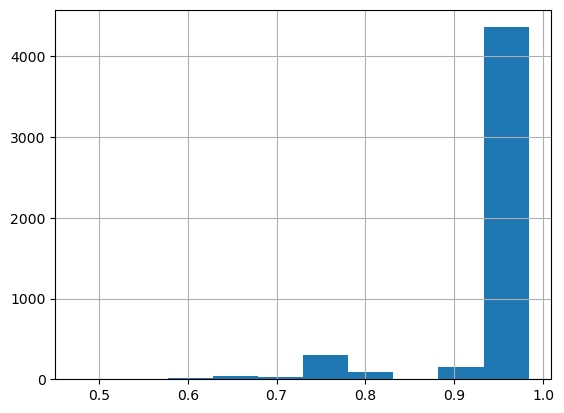

In [ ]:
df_test['pred_prob'].hist();

In [ ]:
df_test[df_test['pred_prob']<0.85][:500]

,transaction_id,sentence,sentence2,description_combined_processed,true_merchant_name_combined,merchant_name_combined,true_label,label,pred_merchant,pred_prob
4,9796686754,Wal-Mart Super WAL-SAMS SPRINGFIELD MO. Channe...,Wal-Mart Super WAL-SAMS SPRINGFIELD MO. Type: ...,Wal-Mart Super WAL-SAMS SPRINGFIELD MO,Walmart,Smith''s,0,0.310292,Wal Wal-martsuper,0.799137
11,9799290885,PURCHASE AUTHORIZED ON 05/14 WM SUPERC Wal-Mar...,PURCHASE AUTHORIZED ON 05/14 WM SUPERC Wal-Mar...,PURCHASE AUTHORIZED ON 05/14 WM SUPERC Wal-Mar...,Walmart,Synchrony,0,0.232759,Wal Wal-martsuper,0.775473
12,9798904474,Walmart.com Bentonville AR XX SIG PURCH 05/13 ...,Walmart.com Bentonville AR XX SIG PURCH 05/13 ...,Walmart.com Bentonville AR XX SIG PURCH 05/13 ...,Walmart,QuikTrip,0,0.075148,Wal Wal-martsuper,0.751793
17,9801927063,PURCHASE AUTHORIZED ON 05/11 WALMART.COM 800-9...,PURCHASE AUTHORIZED ON 05/11 WALMART.COM 800-9...,PURCHASE AUTHORIZED ON 05/11 WALMART.COM 800-9...,Walmart,Cash App,0,0.078535,Wal Wal-martsuper,0.735269
28,9799263021,05/13 22:02 WAL-MART # JONESBORO AR CKCD DEBIT...,05/13 22:02 WAL-MART # JONESBORO AR CKCD DEBIT...,05/13 22:02 WAL-MART # JONESBORO AR CKCD DEBIT,Walmart,Marathon Petroleum,0,0.257865,Wal Wal-martsuper,0.751371
...,...,...,...,...,...,...,...,...,...,...
4960,9807244423,PURCHASE AUTHORIZED ON 05/14 WM SUPERC Wal-Mar...,PURCHASE AUTHORIZED ON 05/14 WM SUPERC Wal-Mar...,PURCHASE AUTHORIZED ON 05/14 WM SUPERC Wal-Mar...,Walmart,Spinstersis,0,0.051089,Wal Wal-martsuper,0.772779
4965,9808452776,Walmart.com 05/14 #XXXXX REFUND Walmart.com Be...,Walmart.com 05/14 #XXXXX REFUND Walmart.com Be...,Walmart.com 05/14 #XXXXX REFUND Walmart.com Be...,Walmart,K Stop Convenience,0,0.018743,Wal Wal-martsuper,0.713919
4971,9798778036,Point of Sale Debit L341 TIME 04:30 PM DATE 05...,Point of Sale Debit L341 TIME 04:30 PM DATE 05...,Point of Sale Debit L341 TIME 04:30 PM DATE 05...,Walmart,Ross Stores,0,0.114881,Wal Wal-martsuper,0.766499
4981,9807593604,CHECKCARD WALMART STA ELENA LA LIBERTAD XXXXX ...,CHECKCARD WALMART STA ELENA LA LIBERTAD XXXXX ...,CHECKCARD WALMART STA ELENA LA LIBERTAD XXXXX ...,Walmart,Lyft,0,0.116438,Wal Wal-martsuper,0.751746


In [ ]:
df_test.shape

(5000, 10)

In [ ]:
df_test['sentence'][100:150]

100    Deposit Debit Ca Earnin CEEEE_B Palo Alto CA D...
101    Zelle payment from AMY HAYES for \"vanishing b...
102    EARNIN CHGFC_B PALO ALTO CA 05/14. Channel: No...
103    PURCHASE AUTHORIZED ON 05/13 MCDONALD''S F IRV...
104    Debit Card Credit EARNIN CCHGA_B PALO ALTO CA....
105    Zelle payment from SUSAN BRODBECK BACsggj269q0...
106    POS Payment McDonalds 154-XXX VA # . Channel: ...
107    ONLINE TRANSFER FROM HUDSON A WAY2SAVE SAVINGS...
108    EARNIN CDHJA_B PALO ALTO CA 05/14. Channel: No...
109    Earnin CEGJA_B Palo Alto CA. Channel: None. Am...
110    ONLINE TRANSFER FROM BENNETT T WAY2SAVE SAVING...
111    Zelle payment from ALEXIS GAUDET BACxe32r3prx....
112    PURCHASE AMZN Mktp US*SY1BN Amzn.com/billWA XX...
113    CASH APP*ERIC LOLA BAR. Channel: None. Amount:...
114    Zelle payment from SHAVONNE MORENO BACpwpbspl0...
115    McDonalds 05-12 BROOKSVILLE FL DEBIT CARD PURC...
116    CHECKCARD CASH APP*WE DESIG XXXXX CA XXXXX XXX...
117    AMZN Mktp US*WN8Q06S Amz

In [ ]:
model.encode(df_test['sentence'][istart:istart+batch_size].tolist())

array([[-0.00816036,  0.27537555,  0.14324246, ...,  0.0999889 ,
        -0.0035936 ,  0.07809736],
       [ 0.02443847, -0.07863627,  0.01445072, ...,  0.02271993,
         0.03442278,  0.02410999],
       [-0.01848849,  0.26305526,  0.12530893, ...,  0.09496655,
         0.00565742,  0.07274164],
       ...,
       [ 0.02032459, -0.06118753,  0.01493401, ..., -0.00625443,
         0.10024939,  0.12695931],
       [-0.01988285, -0.1525213 ,  0.0045229 , ..., -0.01461221,
         0.02463034,  0.0660398 ],
       [-0.01051987, -0.06855395,  0.00723861, ..., -0.00558885,
         0.0144608 ,  0.05602989]], dtype=float32)

In [ ]:
df_test.loc[istart:istart+batch_size-1,'pred_merchant'].shape

(100,)

In [ ]:
df_test.loc[0:100,'label'].shape

(101,)

In [ ]:
df_test[0:100].shape

(100, 10)

In [ ]:
istart+batch_size

100

In [ ]:

len(predicted_merchant)

100

In [ ]:
tx_embedding = model.encode(df_test['sentence'][0:2])

In [ ]:
tx_embedding.shape

(2, 768)

torch.Size([2, 85500])

torch.return_types.max(
values=tensor([0.9616, 0.9750]),
indices=tensor([117,  17]))

tensor([117,  17])

In [ ]:
df_test['merchant_name_combined']

0         Wells Fargo
1         McDonald''s
2            Cash App
3             Verizon
4            Smith''s
            ...      
4995    Chumba Casino
4996            Zelle
4997           Crenco
4998          Empower
4999            Zelle
Name: merchant_name_combined, Length: 5000, dtype: string

In [ ]:
matched_merchants = similarities.max(axis=1)
matched_merchants

NameError: name 'similarities' is not defined

In [ ]:
similarity_score = matched_merchants[0]
similarity_score

tensor([0.9629, 0.9737])

In [ ]:
matched_merchants

NameError: name 'matched_merchants' is not defined

Load model

In [ ]:
print(sentence_transformers.__version__)

3.0.0


In [ ]:
from sentence_transformers import SentenceTransformerModelCardData
from datasets import load_dataset


In [ ]:
# 1. Load a model to finetune with 2. (Optional) model card data
model = SentenceTransformer(
    "microsoft/mpnet-base",
    model_card_data=SentenceTransformerModelCardData(
        language="en",
        license="apache-2.0",
        model_name="MPNet base trained on AllNLI triplets",
    )
)

# 3. Load a dataset to finetune on
dataset = load_dataset("sentence-transformers/all-nli",'pair-score')

No sentence-transformers model found with name microsoft/mpnet-base. Creating a new one with mean pooling.
Some weights of MPNetModel were not initialized from the model checkpoint at microsoft/mpnet-base and are newly initialized: ['mpnet.pooler.dense.bias', 'mpnet.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Generating train split:   0%|          | 0/942069 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/19657 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/19656 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'score'],
        num_rows: 942069
    })
    dev: Dataset({
        features: ['sentence1', 'sentence2', 'score'],
        num_rows: 19657
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'score'],
        num_rows: 19656
    })
})

In [ ]:
train_dataset = dataset['train']

In [ ]:
train_dataset[0]

{'sentence1': 'A person on a horse jumps over a broken down airplane.',
 'sentence2': 'A person is training his horse for a competition.',
 'score': 0.5}

In [ ]:
#train_dataloader = DataLoader(train_examples, shuffle=True, batch_size = 128)

In [ ]:
len(train_dataloader)

668

In [ ]:
#train_loss = losses.CosineSimilarityLoss(model)

In [ ]:
train_loss

NameError: name 'train_loss' is not defined

## Tune the model

In [ ]:
model.fit(train_objectives = [(train_dataloader, train_loss)], epochs = 1 , warmup_steps = 100)

Detected kernel version 4.14.343, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
500,0.020500


In [ ]:
# save model

## Evaluation

In [ ]:
trx_descriptions = df_val['sentence'].tolist()
merchants = df_val['merchant_name_combined'].tolist()
trx_embeddings = model.encode(trx_descriptions)
merchants_embeddings = model.encode(merchants)

In [ ]:
print(trx_embeddings.shape)
print(merchants_embeddings.shape)

(9500, 768)
(9500, 768)


In [ ]:
import numpy as np

In [ ]:
## look into numba
cosine_similarity(trx_embeddings, merchants_embeddings).shape
df_val['cos_similarity']=np.diag(cosine_similarity(trx_embeddings, merchants_embeddings))

In [ ]:
df_val

,transaction_id,sentence,sentence2,description_combined_processed,true_merchant_name_combined,merchant_name_combined,true_label,label,cos_similarity
0,9798760350,Debit Purchase Wal-mart Super Cbrookings Sd 05...,Debit Purchase Wal-mart Super Cbrookings Sd 05...,Debit Purchase Wal-mart Super Cbrookings Sd 05...,Walmart,Exotic S Shop,0,0.328529,0.000262
1,9806775557,MONEY TRANSFER AUTHORIZED ON 05/13 CASH APP*JE...,MONEY TRANSFER AUTHORIZED ON 05/13 CASH APP*JE...,MONEY TRANSFER AUTHORIZED ON 05/13 CASH APP*JE...,Cash App,Acorns,0,0.265679,-0.010028
2,9798728894,MONEY TRANSFER AUTHORIZED ON 05/13 FROM Earnin...,MONEY TRANSFER AUTHORIZED ON 05/13 FROM Earnin...,MONEY TRANSFER AUTHORIZED ON 05/13 FROM Earnin...,Earnin,PayPal,0,0.207873,-0.003231
3,9799291124,MONEY TRANSFER AUTHORIZED ON 05/13 CASH APP*JE...,MONEY TRANSFER AUTHORIZED ON 05/13 CASH APP*JE...,MONEY TRANSFER AUTHORIZED ON 05/13 CASH APP*JE...,Cash App,Wells Fargo,0,0.008904,0.001403
4,9799976650,Instant Pmt from Earnin RDBFA_B on 05/14 Ref# ...,Instant Pmt from Earnin RDBFA_B on 05/14 Ref# ...,Instant Pmt from Earnin RDBFA_B on 05/14 Ref# ...,Earnin,Venmo,0,0.054398,-0.010100
...,...,...,...,...,...,...,...,...,...
9495,9799636891,PURCHASE RETURN AUTHORIZED ON 05/13 AMZN Mktp ...,PURCHASE RETURN AUTHORIZED ON 05/13 AMZN Mktp ...,PURCHASE RETURN AUTHORIZED ON 05/13 AMZN Mktp ...,Amazon,TGI Friday''s,0,0.102636,0.001885
9496,9799365097,"AMZN Mktp US GE69A,2YL3 Amzn com WA,05-13-24,C...","AMZN Mktp US GE69A,2YL3 Amzn com WA,05-13-24,C...","AMZN Mktp US GE69A,2YL3 Amzn com WA,05-13-24,C...",Amazon,Amazon,1,0.840733,0.995985
9497,9814848095,ONLINE TRANSFER FROM NAME N WELLS FARGO CLEAR ...,ONLINE TRANSFER FROM NAME N WELLS FARGO CLEAR ...,ONLINE TRANSFER FROM NAME N WELLS FARGO CLEAR ...,Wells Fargo,Wells Fargo,1,0.888943,0.988127
9498,9799827250,MCDONALD''S F ROCKY RIVER OH 05/13. Channel: i...,MCDONALD''S F ROCKY RIVER OH 05/13. Type: merc...,MCDONALD''S F ROCKY RIVER OH 05/13,McDonald''s,Coca-Cola,0,0.085374,-0.001350


In [ ]:
while True:
    pass

KeyboardInterrupt: 

In [ ]:
validate_data[['label', 'true_label','cos_similarity']]

In [ ]:
# reducer = umap.UMAP(n_epochs=400,  n_neighbors=150, min_dist=0.1)
# reducer.fit(merchants_embeddings
# )
# embedding_2d = reducer.transform(merchants_embeddings)
# fig = px.scatter(embedding_2d, x=0, y=1,opacity=0.05, height=500, hover_name=names)
# fig.show()